In [1]:
import matplotlib.pyplot as plt
import os
from pathlib import Path
import numpy as np 
import glob

In [17]:
path = os.getcwd()
parent_directory = os.path.dirname(path)
path = os.path.join(parent_directory, 'Data')

ISTELL_simons = np.loadtxt("../../Vacuum_Vessel_Shape/Data/circular_cs/R2history_K21500_nphi64_ntheta64.txt",usecols=0)
ISTELL_simons_vol_eff = np.loadtxt("../../Vacuum_Vessel_Shape/Data/circular_cs/eff_vol_history_K21500_nphi64_ntheta64.txt",usecols=0)

list_folders = [f.path for f in os.scandir(path) if f.is_dir()]
ISTELL_results_list=[]

for folder in list_folders:
    MSE_paths = glob.glob(os.path.join(folder, "R2history_*"))
    if len(MSE_paths) != 0:
        for path in MSE_paths:
            ISTELL_results_list.append(np.loadtxt(path,usecols=0))

ISTELL_results = np.array(ISTELL_results_list)[[1,2,4,3,0]]
print(np.array(list_folders)[[1,2,4,3,0]])

['/home/madeira/ISTELL_PPCF/Polarization_Study/Data/f'
 '/home/madeira/ISTELL_PPCF/Polarization_Study/Data/f+fe'
 '/home/madeira/ISTELL_PPCF/Polarization_Study/Data/f+fc'
 '/home/madeira/ISTELL_PPCF/Polarization_Study/Data/f+fe+fc'
 '/home/madeira/ISTELL_PPCF/Polarization_Study/Data/all']


In [18]:
eff_vol_list = []

for folder in list_folders:
    eff_vol_paths = glob.glob(os.path.join(folder, "eff_vol_history_*"))
    
    if len(eff_vol_paths) != 0:
        print(eff_vol_paths)
        for path in eff_vol_paths:
            eff_vol_list.append(np.loadtxt(path,usecols=0))

ISTELL_eff_vol = np.array(eff_vol_list)[[1,2,4,3,0]]

['/home/madeira/ISTELL_PPCF/Polarization_Study/Data/all/eff_vol_history_K52500_nphi64_ntheta64.txt']
['/home/madeira/ISTELL_PPCF/Polarization_Study/Data/f/eff_vol_history_K52500_nphi64_ntheta64.txt']
['/home/madeira/ISTELL_PPCF/Polarization_Study/Data/f+fe/eff_vol_history_K52500_nphi64_ntheta64.txt']
['/home/madeira/ISTELL_PPCF/Polarization_Study/Data/f+fe+fc/eff_vol_history_K52500_nphi64_ntheta64.txt']
['/home/madeira/ISTELL_PPCF/Polarization_Study/Data/f+fc/eff_vol_history_K52500_nphi64_ntheta64.txt']


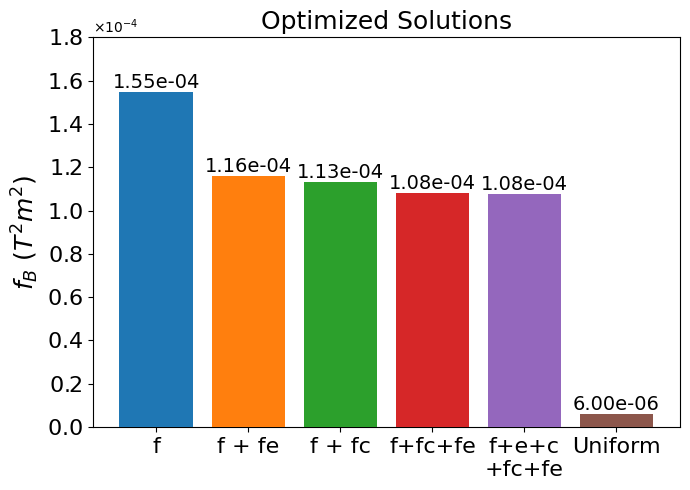

In [19]:
fig, ax = plt.subplots(figsize=(7,5))
ax.ticklabel_format(style="sci",axis='y',scilimits=(0,0), useLocale=None, useMathText=True)
#ax.tick_params(axis='both', which='both', labelsize=12)
legend = ['f','f + fe','f + fc','f+fc+fe','f+e+c\n+fc+fe', 'Uniform']
counts = []
for i in range(len(ISTELL_results)):
    counts.append(min(ISTELL_results[i]))
counts.append(min(ISTELL_simons))
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

bar = ax.bar(legend, counts,width=0.8, color=bar_colors,zorder=3)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2e}', ha='center', va='bottom',fontsize=14)
    
ax.set_ylabel(r'$f_B$ $(T^2m^2)$',fontsize=18)
ax.set_title('Optimized Solutions',fontsize=18)
#ax.grid(axis='y',zorder=0)
ax.set_ylim(0,1.8e-4)

plt.xticks(legend, legend,  ha='center', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig("../Plots/ISTELL_polarization_fB_barplot.pdf")

/tmp/ipykernel_1411/708494271.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


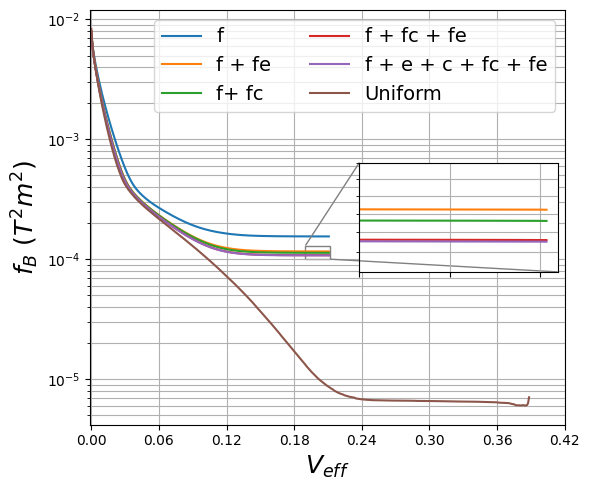

In [20]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots(figsize=(6,5))
plt.xlabel(r'$V_{eff}$',fontsize=18)
plt.ylabel(r'$f_B$ $(T^2m^2)$',fontsize=18)

mu0 = 4 * np.pi * 1e-7
Bmax = 1.465

for i in range(len(ISTELL_results)):
    ax.semilogy(ISTELL_eff_vol[i], ISTELL_results[i])

ax.semilogy(ISTELL_simons_vol_eff, ISTELL_simons,label='unrealistic grid')
plt.legend(['f','f + fe','f+ fc','f + fc + fe','f + e + c + fc + fe', 'Uniform'],ncols=2,fontsize=14)

axins = zoomed_inset_axes(ax, 8, loc=5) 

for i in range(len(ISTELL_results)):
    axins.semilogy(ISTELL_eff_vol[i], ISTELL_results[i])
    
# sub region of the original image
x1, x2, y1, y2 = 0.19, 0.212, 1.000001e-4, 1.3e-4
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
axins.xaxis.set_ticklabels([])
axins.yaxis.set_ticklabels([], minor=True)
                
ax.grid(which='both')
ax.set_xticks([0,0.06,0.12,0.18,0.24,0.3,0.36,0.42])
axins.grid(which='both')
ax.set_xlim(-0.001,0.42)
plt.tight_layout()
plt.savefig('../Plots/ISTELL_polarization_study.pdf')